# Assignment 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import ipywidgets as widgets
from ipywidgets import interact

In [2]:
df = pd.read_csv("Metro.csv")

## Data Cleaning

In [3]:
# Dropping columns which are not needed
df = df.drop('Numéro de tournée', axis=1)
df = df.drop("Numero d'incident", axis=1)
df = df.drop("Incident en minutes", axis=1)
df = df.drop("Évacuation", axis=1)
df = df.drop("Urgence métro", axis=1)
df = df.drop("Année civile/mois", axis=1)
df = df.drop("Jour calendaire", axis=1)

In [4]:
# Display modified dataFrame
df.head()

,Type d'incident,Cause primaire,Cause secondaire,Symptome,Ligne,Heure de l'incident,Heure de reprise,Véhicule,Porte de voiture,Type de matériel,Code de lieu,Dommage matériel,KFS,Porte,CAT,Année civile,Mois calendrier,Jour du mois,Jour de la semaine
0,S,Autres,Autres,Clientèle,Ligne orange,2:56,3:32,#,#,Non affecté,Snowdon,0,0,0,0,2019,1,1,2
1,S,Autres,Autres,Clientèle,Ligne orange,2:56,3:42,#,#,Non affecté,Snowdon,0,0,0,0,2019,1,1,2
2,S,Autres,Autres,Clientèle,Ligne verte,3:35,4:41,#,#,Non affecté,Place-des-Arts,0,0,0,0,2019,1,1,2
3,S,Autres,Autres,Clientèle,Ligne verte,4:56,5:36,#,#,Non affecté,Lionel-Groulx,0,0,0,0,2019,1,1,2
4,S,Autres,Autres,Clientèle,Ligne verte,5:25,5:54,#,#,Non affecté,Berri-UQAM,0,0,0,0,2019,1,1,2


In [5]:
df.Ligne.unique()

array(['Ligne orange', 'Ligne verte', 'Ligne bleue', 'Ligne jaune',
       'Ligne 1, 2, 4, 5', 'Non affecté', 'Ligne 1, 2, 4', 'Ligne 1, 2',
       'Ligne 2, 1', 'Ligne 2, 1, 4', 'Ligne 2, 5', 'Ligne 5, 2',
       'Ligne 2, 4', '5-Jan', '2/1/2004', '1/2/2004', '1/5/2002'],
      dtype=object)

In [6]:
# Remove erroneous entries
df.drop(df[df.Ligne=='05-Jan'].index, inplace=True)
df.drop(df[df.Ligne=='2004-02-01'].index, inplace=True)
df.drop(df[df.Ligne=='2004-01-02'].index, inplace=True)
df.drop(df[df.Ligne=='2002-01-05'].index, inplace=True)

# Remove incidents which did not affect any metro line
df.drop(df[df.Ligne=='Non affecté'].index, inplace=True)

In [7]:
# Remove incidents which are of type metro station (to keep only incidents which affected the metro service)

In [8]:
df = df.drop(df[df["Type d'incident"] == 'S'].index)
# Now we can remove the column as it is no longer usefull
df = df.drop("Type d'incident", axis=1)

## Processing 

In [9]:
# Convert the times to datatime objects
# Problem: as sometimes the format is not consistent (sometimes it has the format HH:MM:SS) this will raise errors
#          We use the option errors='coerce' to ignore errors and isnted fill the dataFrame field with NaT
t1 = pd.to_datetime(df["Heure de l'incident"], format='%H:%M', errors='coerce')
t2 = pd.to_datetime(df['Heure de reprise'], format='%H:%M', errors='coerce')

In [10]:
# convert start and end time in fraction of hours since midnight
df["Heure de l'incident"] = t1.apply(lambda x: (x.hour + x.minute / 60 ))
df['Heure de reprise'] = t2.apply(lambda x: (x.hour + x.minute / 60 ))

In [11]:
# compute duration of interuption in minutes and add one column to dataFrame
df['duration'] = (df['Heure de reprise']-df["Heure de l'incident"]) * 60

# Alternative way using datetime functions:
# df['duration']  = (t2-t1)/np.timedelta64(1, 'm')

In [12]:
df.head()

,Cause primaire,Cause secondaire,Symptome,Ligne,Heure de l'incident,Heure de reprise,Véhicule,Porte de voiture,Type de matériel,Code de lieu,Dommage matériel,KFS,Porte,CAT,Année civile,Mois calendrier,Jour du mois,Jour de la semaine,duration
8621,Autres,Causes externes,"Feu, fumée, odeur, produit, etc...",Ligne verte,2.466667,2.466667,#,#,Non affecté,Berri-UQAM,0,0,0,0,2019,1,1,2,0.0
8622,Clientèle,Méfait volontaire,Clientèle,Ligne verte,2.616667,2.616667,#,#,Non affecté,Place-des-Arts,0,0,0,1,2019,1,1,2,0.0
8623,Clientèle,Méfait volontaire,Clientèle,Ligne verte,9.400000,9.400000,#,#,Non affecté,Charlevoix,0,0,0,1,2019,1,1,2,0.0
8624,Équipements fixes,Service aux trains,Équipements fixes,Ligne orange,9.666667,9.666667,#,#,Non affecté,Montmorency,0,0,0,0,2019,1,1,2,0.0
8625,Clientèle,Méfait volontaire,Clientèle,Ligne verte,15.650000,15.650000,#,#,Non affecté,Pie-IX,0,0,0,0,2019,1,1,2,0.0


## General 

In [13]:
df.describe()

,Heure de l'incident,Heure de reprise,Dommage matériel,KFS,Porte,CAT,Année civile,Mois calendrier,Jour du mois,Jour de la semaine,duration
count,15222.000000,15192.000000,15772.000000,15772.000000,15772.000000,15772.000000,15772.000000,15772.000000,15772.000000,15772.000000,15192.000000
mean,13.613676,13.662948,0.012427,0.034555,0.116409,0.242835,2020.339589,6.078177,15.715508,3.817461,4.121709
std,5.231810,5.223689,0.110786,0.182655,0.320725,0.428810,1.142200,3.417632,8.761179,1.931676,12.456272
min,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,2019.000000,1.000000,1.000000,1.000000,0.000000
25%,8.950000,9.016667,0.000000,0.000000,0.000000,0.000000,2019.000000,3.000000,8.000000,2.000000,0.000000
50%,13.450000,13.516667,0.000000,0.000000,0.000000,0.000000,2020.000000,6.000000,16.000000,4.000000,2.000000
75%,17.700000,17.750000,0.000000,0.000000,0.000000,0.000000,2021.000000,9.000000,23.000000,5.000000,4.000000
max,23.983333,23.983333,1.000000,1.000000,1.000000,1.000000,2022.000000,12.000000,31.000000,7.000000,547.000000


## Answers: 

### 1. The main primary and second causes for interruptions:

### The most frequent primary cause ('Cause primaire') for incidents:
 


In [14]:
df["Cause primaire"].unique()

array(['Autres', 'Clientèle', 'Équipements fixes', 'Matériel roulant',
       'Exploitation trains', '#N/D'], dtype=object)

In [15]:
df.groupby("Cause primaire").count()

,Cause secondaire,Symptome,Ligne,Heure de l'incident,Heure de reprise,Véhicule,Porte de voiture,Type de matériel,Code de lieu,Dommage matériel,KFS,Porte,CAT,Année civile,Mois calendrier,Jour du mois,Jour de la semaine,duration
Cause primaire,,,,,,,,,,,,,,,,,,
#N/D,14,14,14,13,13,14,14,14,14,14,14,14,14,14,14,14,14,13
Autres,1045,1045,1045,1013,1013,1045,1045,1045,1045,1045,1045,1045,1045,1045,1045,1045,1045,1013
Clientèle,8346,8346,8346,7981,7961,8346,8346,8346,8346,8346,8346,8346,8346,8346,8346,8346,8346,7961
Exploitation trains,1521,1521,1521,1481,1480,1521,1521,1521,1521,1521,1521,1521,1521,1521,1521,1521,1521,1480
Matériel roulant,2656,2656,2656,2611,2606,2656,2656,2656,2656,2656,2656,2656,2656,2656,2656,2656,2656,2606
Équipements fixes,2190,2190,2190,2123,2119,2190,2190,2190,2190,2190,2190,2190,2190,2190,2190,2190,2190,2119


In [16]:
incidents = df.groupby("Cause primaire").count()['duration']
incidents.idxmax()


'Clientèle'

 So,the most frequent primary cause ('Cause primaire') for incidents is "Clientèle".

### The most frequent secondary cause ('Cause secondaire') for incidents:

In [17]:
df["Cause secondaire"].unique()

array(['Causes externes', 'Méfait volontaire', 'Service aux trains',
       'MR-73', 'Blessée ou malade', 'Nuisance involontaire', 'MPM-10',
       'Contrats Réno-Stations', 'Contrats Réno-Système',
       'Ligne 1, 2, 4, 5', 'Service de la voie', 'Service aux stations',
       'Centre de contrôle', 'Pers. / Équipement STM', 'Contrats MPM10',
       'Véhicules de travaux', '#N/D', 'Pers. / Équipement Externe',
       'Service TCPE', 'Matériel roulant'], dtype=object)

In [18]:
df.groupby("Cause secondaire").count()

,Cause primaire,Symptome,Ligne,Heure de l'incident,Heure de reprise,Véhicule,Porte de voiture,Type de matériel,Code de lieu,Dommage matériel,KFS,Porte,CAT,Année civile,Mois calendrier,Jour du mois,Jour de la semaine,duration
Cause secondaire,,,,,,,,,,,,,,,,,,
#N/D,14,14,14,13,13,14,14,14,14,14,14,14,14,14,14,14,14,13
Blessée ou malade,1531,1531,1531,1487,1481,1531,1531,1531,1531,1531,1531,1531,1531,1531,1531,1531,1531,1481
Causes externes,394,394,394,379,379,394,394,394,394,394,394,394,394,394,394,394,394,379
Centre de contrôle,65,65,65,57,56,65,65,65,65,65,65,65,65,65,65,65,65,56
Contrats MPM10,90,90,90,88,88,90,90,90,90,90,90,90,90,90,90,90,90,88
Contrats Réno-Stations,207,207,207,198,198,207,207,207,207,207,207,207,207,207,207,207,207,198
Contrats Réno-Système,100,100,100,97,97,100,100,100,100,100,100,100,100,100,100,100,100,97
"Ligne 1, 2, 4, 5",1456,1456,1456,1424,1424,1456,1456,1456,1456,1456,1456,1456,1456,1456,1456,1456,1456,1424
MPM-10,767,767,767,755,754,767,767,767,767,767,767,767,767,767,767,767,767,754


In [19]:
incidents = df.groupby("Cause secondaire").count()['duration']
incidents.idxmax()


'Méfait volontaire'

So,the most frequent primary cause ('Cause secondaire') for incidents is 'Méfait volontaire'.

### A pie chart for the primary causes for the year 2019:

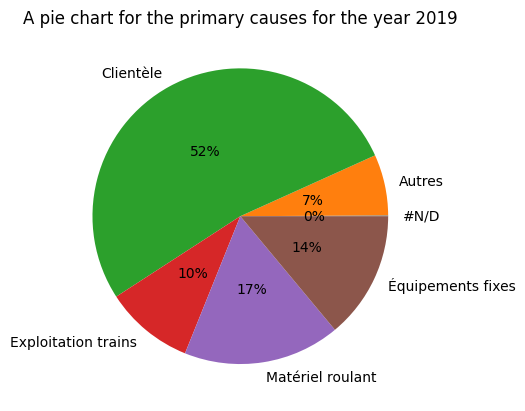

In [51]:
incidents2019 = df[(df["Année civile"] == 2019)]
incidents = df.groupby(["Cause primaire"]).count()['duration']
plt.pie(incidents, labels=incidents.index, autopct='%1.0f%%', pctdistance=0.5)
plt.title("A pie chart for the primary causes for the year 2019")
plt.show()



### 2. The metro stations which are most often a source of incidents: 

In [66]:
df["Ligne"].unique()
df.groupby("Ligne").count()

,Cause primaire,Cause secondaire,Symptome,Heure de l'incident,Heure de reprise,Véhicule,Porte de voiture,Type de matériel,Code de lieu,Dommage matériel,KFS,Porte,CAT,Année civile,Mois calendrier,Jour du mois,Jour de la semaine,duration
Ligne,,,,,,,,,,,,,,,,,,
1/2/2004,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1/5/2002,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2/1/2004,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
5-Jan,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
"Ligne 1, 2",59,59,59,57,56,59,59,59,59,59,59,59,59,59,59,59,59,56
"Ligne 1, 2, 4",27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27
"Ligne 1, 2, 4, 5",8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
"Ligne 2, 1",24,24,24,19,19,24,24,24,24,24,24,24,24,24,24,24,24,19
"Ligne 2, 1, 4",5,5,5,3,3,5,5,5,5,5,5,5,5,5,5,5,5,3


In [90]:
df1 = df[(df.Ligne == 'Ligne orange') | (df.Ligne == 'Ligne verte') | (df.Ligne == 'Ligne bleue') | (df.Ligne == 'Ligne jaune')].copy()

In [92]:
# Orange line
df_orange = df[df.Ligne.str.contains("1")]
df_orange = df_orange.assign(Ligne='Ligne orange')
df1 = pd.concat([df1, df_orange])

# Green line
df_green = df[df.Ligne.str.contains("2")]
df_green = df_green.assign(Ligne='Ligne verte')
df1 = pd.concat([df1, df_green])

# Blue line *** Line number is 4 and not 3 as one may expect ***
df_blue = df[df.Ligne.str.contains("4")]
df_blue = df_blue.assign(Ligne='Ligne bleue')
df1 = pd.concat([df1, df_blue])

# Yellow line *** Line number is 5 and not 4 as one may expect ***
df_yellow = df[df.Ligne.str.contains("5")]
df_yellow = df_yellow.assign(Ligne='Ligne jaune')
df1 = pd.concat([df1, df_yellow])

In [107]:
incidents = df1[df1["Ligne"]=="Ligne orange"].groupby("Code de lieu").count()['duration']
incidents.idxmax()

'Côte-Vertu'

In [111]:
incidents = df1[df1["Ligne"]=="Ligne verte"].groupby("Code de lieu").count()['duration']
incidents.idxmax()

'Berri-UQAM'

In [109]:
incidents = df1[df1["Ligne"]=="Ligne bleue"].groupby("Code de lieu").count()['duration']
incidents.idxmax()

'Snowdon'

In [113]:
incidents = df1[df1["Ligne"]=="Ligne jaune"].groupby("Code de lieu").count()['duration']
incidents.idxmax()

'Berri-UQAM'

#### Following stations are the major source of incidents in each line:
 ##### Ligne Orange- Cote Vertu 
 ##### Lign Verte- Berri UQAM
 ##### Lign Bleue- Snowdon
 ##### Ligne Bleue- Berri UQAM 

## 3. Events due to the use of emergency break by users: